<a href="https://colab.research.google.com/github/OCE1984/MScDataAnaltyicsPrinciples/blob/main/DAP_Final_Assessment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Analysis

## Importing Tools

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Loading the Dataset

In [3]:
file_path = "https://raw.githubusercontent.com/OCE1984/MScDataAnaltyicsPrinciples/main/airline_passenger_satisfaction.csv"  # Changed to the raw file URL
df_original = pd.read_csv(file_path)

## Exploratory Data Analysis (EDA)

In [4]:
print("\nDataset Info:")
df_original.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking       

In [5]:
print("\nSummary Statistics:")
df_original.describe()


Summary Statistics:


,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
print("\nMissing Values:")
print(df_original.isnull().sum())


Missing Values:
ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Enterta

<ipython-input-7-90daefe21240>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x=col, palette="pastel")


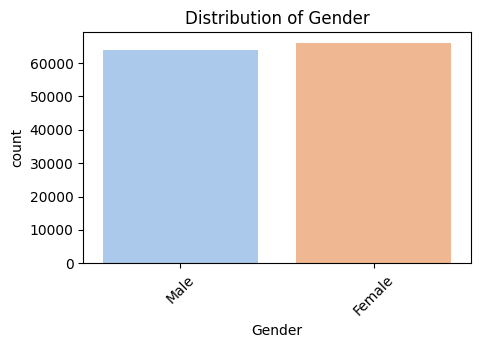

<ipython-input-7-90daefe21240>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x=col, palette="pastel")


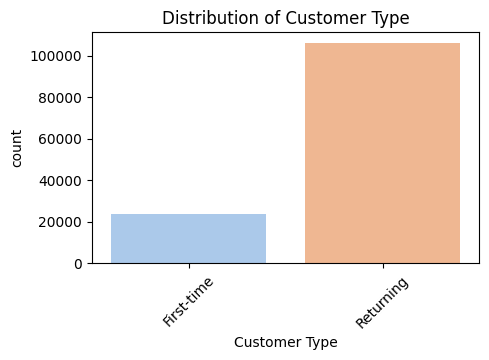

<ipython-input-7-90daefe21240>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x=col, palette="pastel")


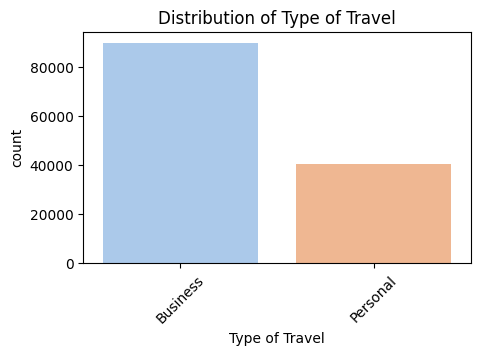

<ipython-input-7-90daefe21240>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x=col, palette="pastel")


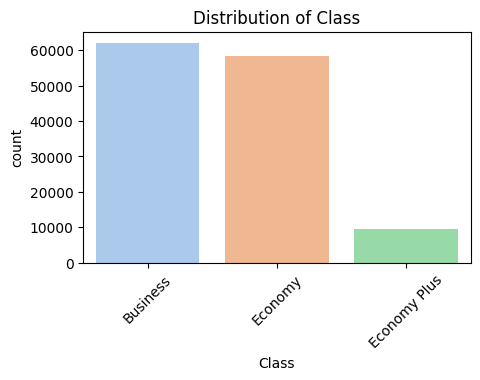

<ipython-input-7-90daefe21240>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x=col, palette="pastel")


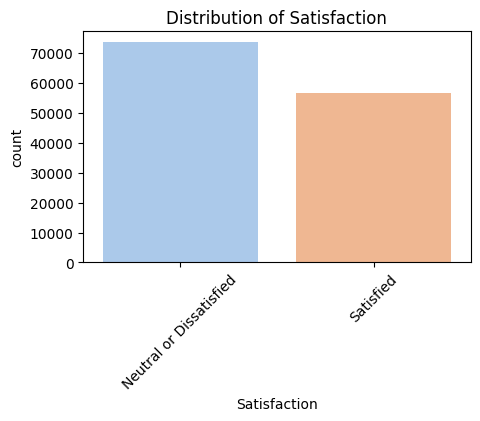

In [7]:
categorical_cols = ["Gender", "Customer Type", "Type of Travel", "Class", "Satisfaction"]
for col in categorical_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df_original, x=col, palette="pastel")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

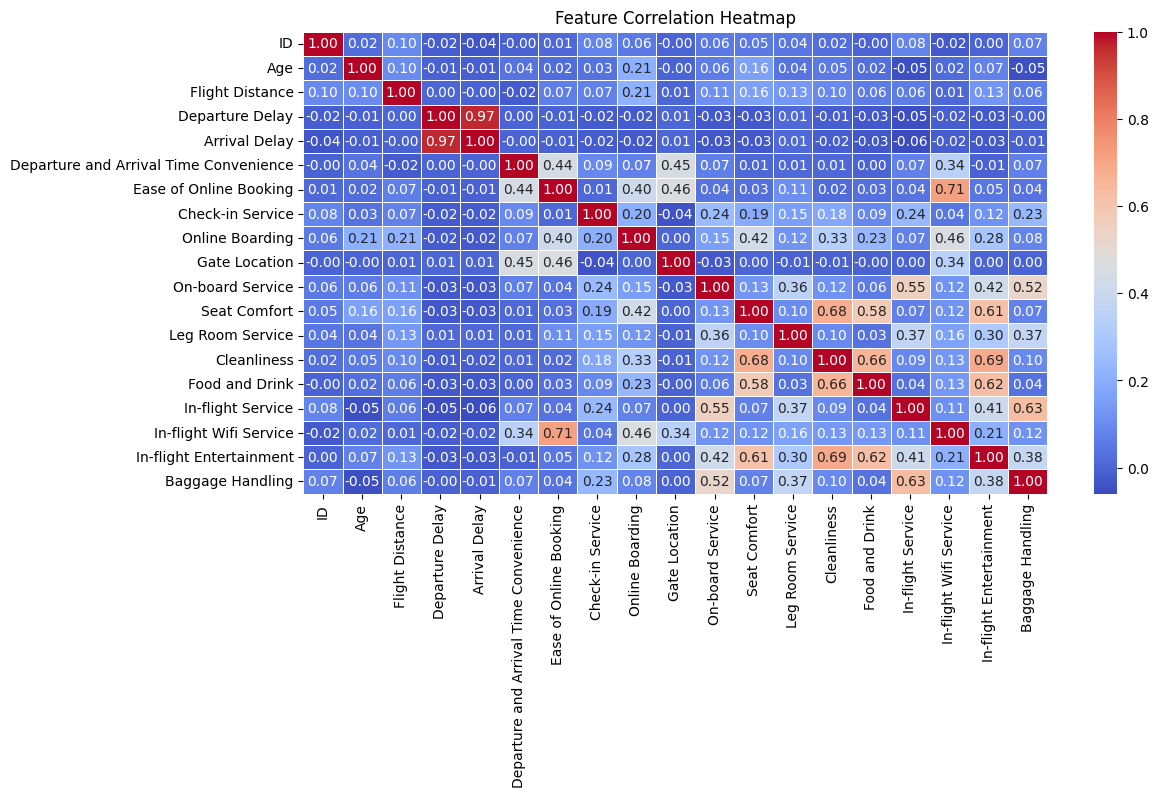

In [8]:
# Before the heatmap code:
numerical_cols = df_original.select_dtypes(include=np.number).columns.tolist()

# Then generate the heatmap with:
plt.figure(figsize=(12, 6))
sns.heatmap(df_original[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Cleaning the Data

In [9]:
df_original.drop(columns=["ID"], inplace=True)  # 'ID' is not useful for modeling
df_original.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [10]:
df_original["Arrival Delay"].fillna(df_original["Arrival Delay"].median(), inplace=True)
df_original.describe()

<ipython-input-10-31b779c1b6e2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original["Arrival Delay"].fillna(df_original["Arrival Delay"].median(), inplace=True)


,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.045465,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.416353,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
print("\nMissing Values:")
print(df_original.isnull().sum())


Missing Values:
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction   

In [12]:
# Select categorical columns
categorical_cols = ["Gender", "Customer Type", "Type of Travel", "Class", "Satisfaction"]

# Create a dictionary to store mappings
encoding_mappings = []

# Apply Label Encoding
label_encoders = {}
df_encoded = df_original.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])  # Convert categorical to numerical
    label_encoders[col] = le  # Store encoder for reference

    # Store mappings
    for category, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        encoding_mappings.append([col, category, encoded_value])

# Create a DataFrame to display mappings
encoding_summary_df = pd.DataFrame(encoding_mappings, columns=["Column Name", "Category", "Encoded Value"])

# Display result
print(encoding_summary_df)


       Column Name                 Category  Encoded Value
0           Gender                   Female              0
1           Gender                     Male              1
2    Customer Type               First-time              0
3    Customer Type                Returning              1
4   Type of Travel                 Business              0
5   Type of Travel                 Personal              1
6            Class                 Business              0
7            Class                  Economy              1
8            Class             Economy Plus              2
9     Satisfaction  Neutral or Dissatisfied              0
10    Satisfaction                Satisfied              1


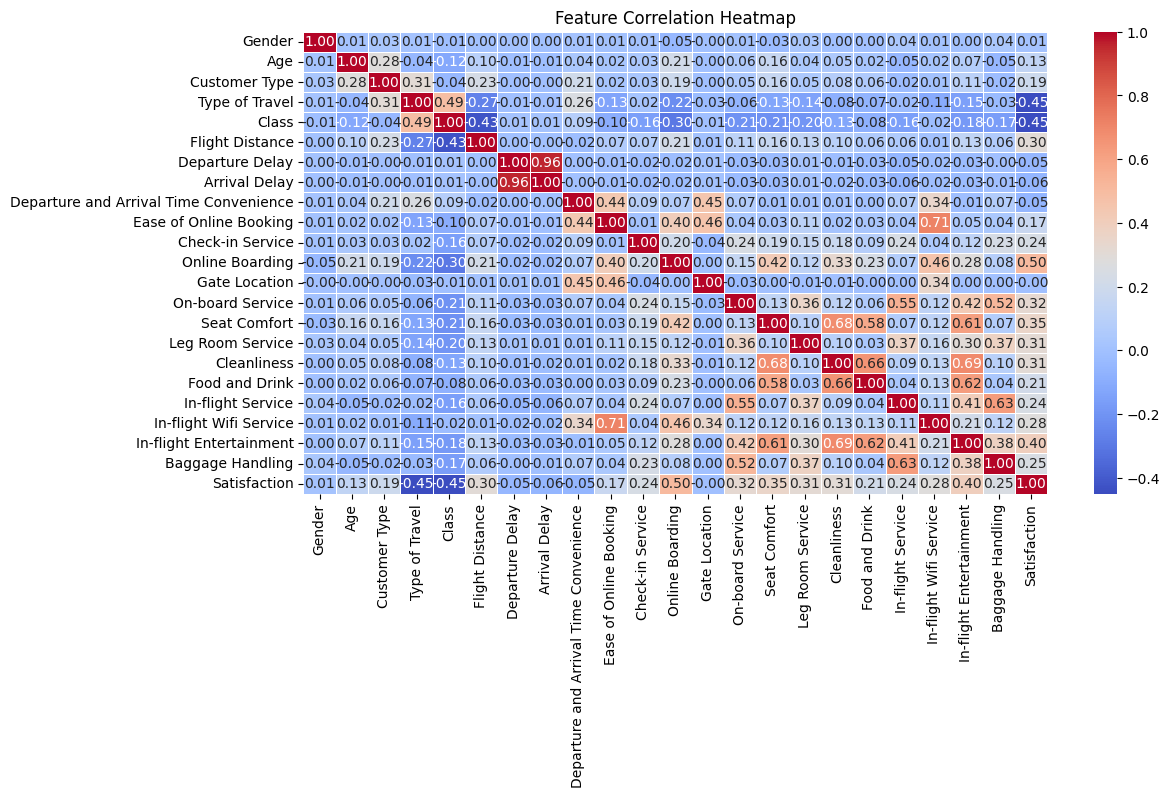

In [13]:
# Before the heatmap code:
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()

# Then generate the heatmap with:
plt.figure(figsize=(12, 6))
sns.heatmap(df_encoded[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1.014878,0.566960,-2.112281,-0.669366,-0.955724,-0.370261,-0.333948,-0.261490,-0.037727,0.173445,...,-0.297587,1.181428,-1.026310,1.304487,1.349867,1.153946,0.204090,1.230787,1.159206,-0.876487
1,-0.985340,-0.292868,0.473422,-0.669366,-0.955724,-0.370261,0.296454,0.623553,-0.692719,-0.539957,...,1.256300,0.423441,1.252898,1.304487,-0.153973,1.153946,-0.548166,1.230787,1.159206,1.140918
2,1.014878,0.103976,0.473422,-0.669366,-0.955724,-0.338179,-0.386481,-0.391644,0.617265,0.886847,...,-0.297587,1.181428,-0.266574,1.304487,1.349867,-0.545774,0.956346,-0.268414,-0.535681,1.140918
3,1.014878,0.699242,0.473422,-0.669366,-0.955724,0.716512,-0.386481,-0.391644,-0.692719,-0.539957,...,1.256300,1.181428,1.252898,0.543264,0.597947,1.153946,-0.548166,1.230787,1.159206,1.140918
4,-0.985340,0.633101,0.473422,-0.669366,-0.955724,2.285515,-0.386481,-0.365613,-0.037727,0.173445,...,-0.297587,0.423441,0.493162,1.304487,0.597947,-0.545774,0.204090,-0.268414,-0.535681,1.140918


## Feature Engineering

In [15]:
df_encoded["Long Delay"] = (df_encoded["Arrival Delay"] > 30).astype(int)
df_encoded.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Long Delay
0,1.014878,0.566960,-2.112281,-0.669366,-0.955724,-0.370261,-0.333948,-0.261490,-0.037727,0.173445,...,1.181428,-1.026310,1.304487,1.349867,1.153946,0.204090,1.230787,1.159206,-0.876487,0
1,-0.985340,-0.292868,0.473422,-0.669366,-0.955724,-0.370261,0.296454,0.623553,-0.692719,-0.539957,...,0.423441,1.252898,1.304487,-0.153973,1.153946,-0.548166,1.230787,1.159206,1.140918,0
2,1.014878,0.103976,0.473422,-0.669366,-0.955724,-0.338179,-0.386481,-0.391644,0.617265,0.886847,...,1.181428,-0.266574,1.304487,1.349867,-0.545774,0.956346,-0.268414,-0.535681,1.140918,0
3,1.014878,0.699242,0.473422,-0.669366,-0.955724,0.716512,-0.386481,-0.391644,-0.692719,-0.539957,...,1.181428,1.252898,0.543264,0.597947,1.153946,-0.548166,1.230787,1.159206,1.140918,0
4,-0.985340,0.633101,0.473422,-0.669366,-0.955724,2.285515,-0.386481,-0.365613,-0.037727,0.173445,...,0.423441,0.493162,1.304487,0.597947,-0.545774,0.204090,-0.268414,-0.535681,1.140918,0


In [16]:
df_encoded["Loyal Business Traveler"] = ((df_encoded["Customer Type"] == 0) & (df_encoded["Type of Travel"] == 0)).astype(int)
df_encoded.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Long Delay,Loyal Business Traveler
0,1.014878,0.566960,-2.112281,-0.669366,-0.955724,-0.370261,-0.333948,-0.261490,-0.037727,0.173445,...,-1.026310,1.304487,1.349867,1.153946,0.204090,1.230787,1.159206,-0.876487,0,0
1,-0.985340,-0.292868,0.473422,-0.669366,-0.955724,-0.370261,0.296454,0.623553,-0.692719,-0.539957,...,1.252898,1.304487,-0.153973,1.153946,-0.548166,1.230787,1.159206,1.140918,0,0
2,1.014878,0.103976,0.473422,-0.669366,-0.955724,-0.338179,-0.386481,-0.391644,0.617265,0.886847,...,-0.266574,1.304487,1.349867,-0.545774,0.956346,-0.268414,-0.535681,1.140918,0,0
3,1.014878,0.699242,0.473422,-0.669366,-0.955724,0.716512,-0.386481,-0.391644,-0.692719,-0.539957,...,1.252898,0.543264,0.597947,1.153946,-0.548166,1.230787,1.159206,1.140918,0,0
4,-0.985340,0.633101,0.473422,-0.669366,-0.955724,2.285515,-0.386481,-0.365613,-0.037727,0.173445,...,0.493162,1.304487,0.597947,-0.545774,0.204090,-0.268414,-0.535681,1.140918,0,0


In [17]:
df_original.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

<ipython-input-46-32d83d55fb5f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


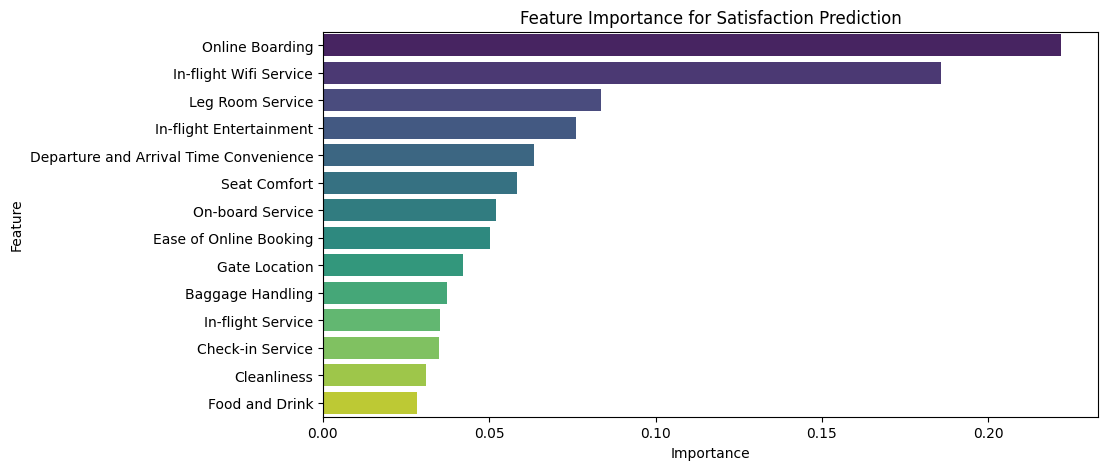

                                   Feature  Importance  Normalized Weight
5                          Online Boarding    0.221870           0.221870
0                   In-flight Wifi Service    0.185810           0.185810
9                         Leg Room Service    0.083620           0.083620
7                  In-flight Entertainment    0.076178           0.076178
1   Departure and Arrival Time Convenience    0.063575           0.063575
6                             Seat Comfort    0.058215           0.058215
8                         On-board Service    0.051945           0.051945
2                   Ease of Online Booking    0.050277           0.050277
3                            Gate Location    0.041966           0.041966
10                        Baggage Handling    0.037332           0.037332
12                       In-flight Service    0.035190           0.035190
11                        Check-in Service    0.034806           0.034806
13                             Cleanli

In [46]:
# Select features and target
rating_features = ["In-flight Wifi Service", "Departure and Arrival Time Convenience", "Ease of Online Booking",
                   "Gate Location", "Food and Drink", "Online Boarding", "Seat Comfort", "In-flight Entertainment",
                   "On-board Service", "Leg Room Service", "Baggage Handling", "Check-in Service",
                   "In-flight Service", "Cleanliness"]

rating_features = [col.strip() for col in rating_features]  #Remove any leading/trailing spaces to ensure name consistency

X = df_original[rating_features]
y = df_original["Satisfaction"]  # Target variable

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({"Feature": rating_features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.title("Feature Importance for Satisfaction Prediction")
plt.show()

# Normalize weights to sum to 1
importance_df["Normalized Weight"] = importance_df["Importance"] / importance_df["Importance"].sum()

# Print final feature weights
print(importance_df)

# Compute weighted satisfaction score
df_encoded["Weighted Satisfaction Score"] = sum(df_encoded[feature] * weight for feature, weight in zip(importance_df["Feature"], importance_df["Normalized Weight"]))


In [47]:
y

,Satisfaction
0,Neutral or Dissatisfied
1,Satisfied
2,Satisfied
3,Satisfied
4,Satisfied
...,...
129875,Neutral or Dissatisfied
129876,Neutral or Dissatisfied
129877,Neutral or Dissatisfied
129878,Satisfied


In [48]:
df_encoded["Weighted Satisfaction Score"]

,Weighted Satisfaction Score
0,0.246243
1,0.481786
2,0.651112
3,0.359399
4,0.371637
...,...
129875,0.492683
129876,0.193110
129877,-0.270961
129878,0.627511


In [19]:
df_encoded.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Long Delay,Loyal Business Traveler,Weighted Satisfaction Score
0,1.014878,0.566960,-2.112281,-0.669366,-0.955724,-0.370261,-0.333948,-0.261490,-0.037727,0.173445,...,1.304487,1.349867,1.153946,0.204090,1.230787,1.159206,-0.876487,0,0,0.246243
1,-0.985340,-0.292868,0.473422,-0.669366,-0.955724,-0.370261,0.296454,0.623553,-0.692719,-0.539957,...,1.304487,-0.153973,1.153946,-0.548166,1.230787,1.159206,1.140918,0,0,0.481786
2,1.014878,0.103976,0.473422,-0.669366,-0.955724,-0.338179,-0.386481,-0.391644,0.617265,0.886847,...,1.304487,1.349867,-0.545774,0.956346,-0.268414,-0.535681,1.140918,0,0,0.651112
3,1.014878,0.699242,0.473422,-0.669366,-0.955724,0.716512,-0.386481,-0.391644,-0.692719,-0.539957,...,0.543264,0.597947,1.153946,-0.548166,1.230787,1.159206,1.140918,0,0,0.359399
4,-0.985340,0.633101,0.473422,-0.669366,-0.955724,2.285515,-0.386481,-0.365613,-0.037727,0.173445,...,1.304487,0.597947,-0.545774,0.204090,-0.268414,-0.535681,1.140918,0,0,0.371637


In [20]:
df_encoded.groupby("Class")["Food and Drink"].mean()

,Food and Drink
Class,
-0.955724,0.094126
0.653608,-0.088890
2.262940,-0.070959


## Machine Learning

### Supervised

#### Performance Metrics

Classification Report:
                          precision    recall  f1-score   support

Neutral or Dissatisfied       0.94      0.96      0.95     14723
              Satisfied       0.95      0.92      0.94     11253

               accuracy                           0.95     25976
              macro avg       0.95      0.94      0.95     25976
           weighted avg       0.95      0.95      0.95     25976



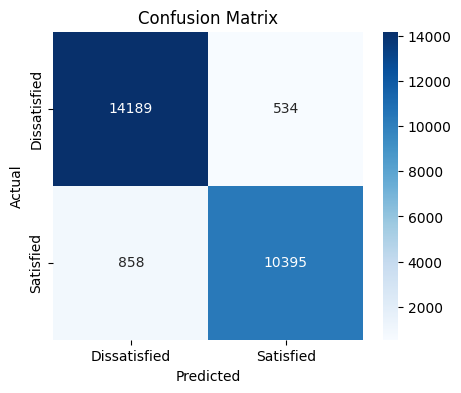

Accuracy: 0.9464
Precision: 0.9511
Recall: 0.9238
F1-score: 0.9372


In [21]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="Satisfied")
recall = recall_score(y_test, y_pred, pos_label="Satisfied")
f1 = f1_score(y_test, y_pred, pos_label="Satisfied")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Dissatisfied", "Satisfied"], yticklabels=["Dissatisfied", "Satisfied"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

In [22]:
y_test.value_counts()

,count
Satisfaction,
Neutral or Dissatisfied,14723
Satisfied,11253


In [23]:
# Create custom scorers
precision_scorer = make_scorer(precision_score, pos_label="Satisfied")
recall_scorer = make_scorer(recall_score, pos_label="Satisfied")
f1_scorer = make_scorer(f1_score, pos_label="Satisfied")

# Perform 5-fold cross-validation
cv_accuracy = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
cv_precision = cross_val_score(rf, X_train, y_train, cv=5, scoring=precision_scorer)
cv_recall = cross_val_score(rf, X_train, y_train, cv=5, scoring=recall_scorer)
cv_f1 = cross_val_score(rf, X_train, y_train, cv=5, scoring=f1_scorer)

# Print results
print(f"Cross-Validation Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Cross-Validation Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"Cross-Validation Recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"Cross-Validation F1-score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

Cross-Validation Accuracy: 0.9449 ± 0.0019
Cross-Validation Precision: 0.9510 ± 0.0031
Cross-Validation Recall: 0.9208 ± 0.0024
Cross-Validation F1-score: 0.9356 ± 0.0022


#### Feature Stability

                                   Feature  Mean Importance   Std Dev
0                   In-flight Wifi Service         0.209235  0.002630
5                          Online Boarding         0.084886  0.001712
9                         Leg Room Service         0.050412  0.001571
3                            Gate Location         0.043486  0.000813
7                  In-flight Entertainment         0.032788  0.000928
1   Departure and Arrival Time Convenience         0.030836  0.000435
12                       In-flight Service         0.025470  0.001024
11                        Check-in Service         0.022278  0.001050
8                         On-board Service         0.021535  0.000859
13                             Cleanliness         0.021497  0.000615
10                        Baggage Handling         0.019749  0.000804
6                             Seat Comfort         0.018386  0.000746
4                           Food and Drink         0.015980  0.000583
2                   

<ipython-input-26-6996a4127b78>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perm_df["Mean Importance"], y=perm_df["Feature"], palette="plasma")


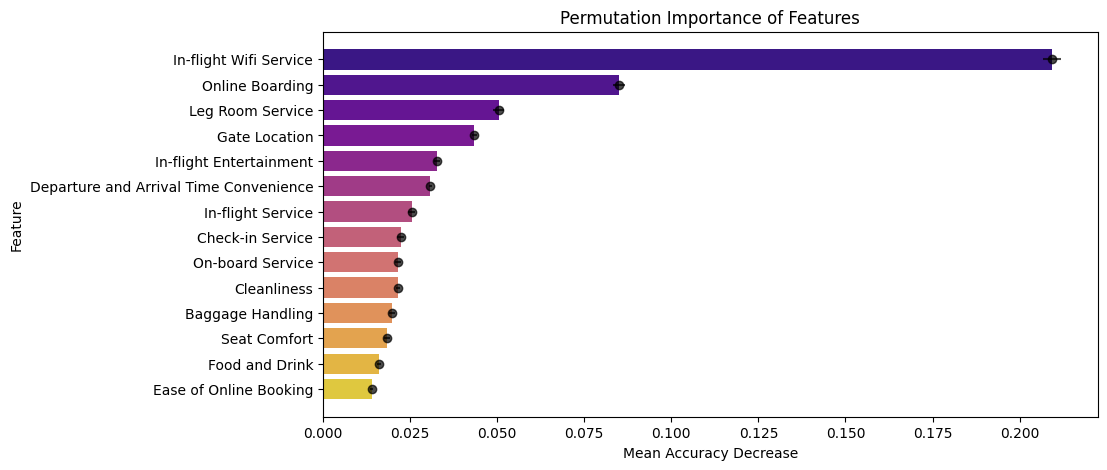

In [26]:
# Perform Permutation Importance on the trained model
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, scoring="accuracy")

# Store results in a DataFrame
perm_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Mean Importance": perm_importance.importances_mean,
    "Std Dev": perm_importance.importances_std
})

# Sort by mean importance
perm_df = perm_df.sort_values(by="Mean Importance", ascending=False)

# Display results
print(perm_df)

# Ensure Std Dev is a NumPy array
xerr_values = np.array(perm_df["Std Dev"])

# Plot Permutation Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=perm_df["Mean Importance"], y=perm_df["Feature"], palette="plasma")

# Add error bars separately
plt.errorbar(perm_df["Mean Importance"], perm_df["Feature"], xerr=xerr_values, fmt='o', color='black', alpha=0.7)

plt.title("Permutation Importance of Features")
plt.xlabel("Mean Accuracy Decrease")
plt.ylabel("Feature")
plt.show()

#### Linear Regression

R² Score: 0.3984
Mean Absolute Error (MAE): 0.6381
Mean Squared Error (MSE): 0.6012
Root Mean Squared Error (RMSE): 0.7754


<ipython-input-39-95ee807959a4>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients["Coefficient"], y=coefficients["Feature"], palette="coolwarm")


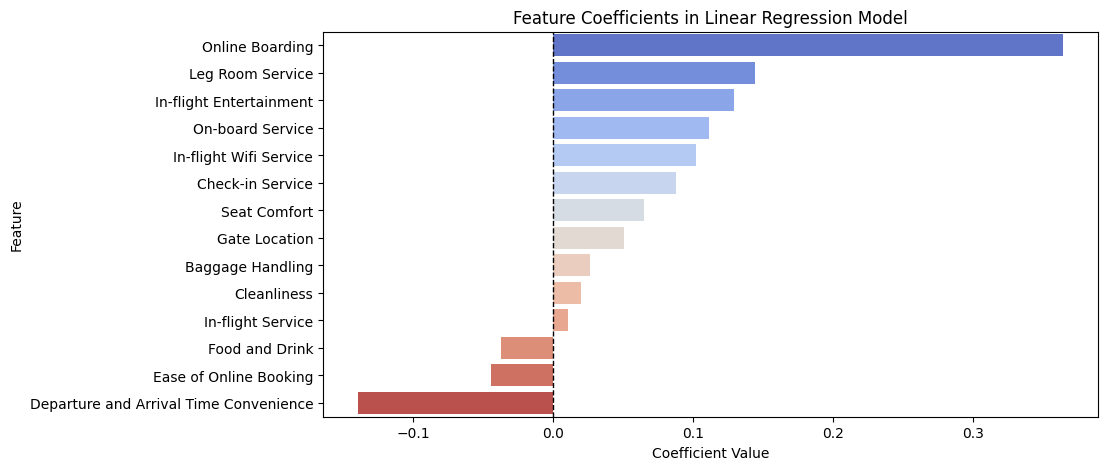

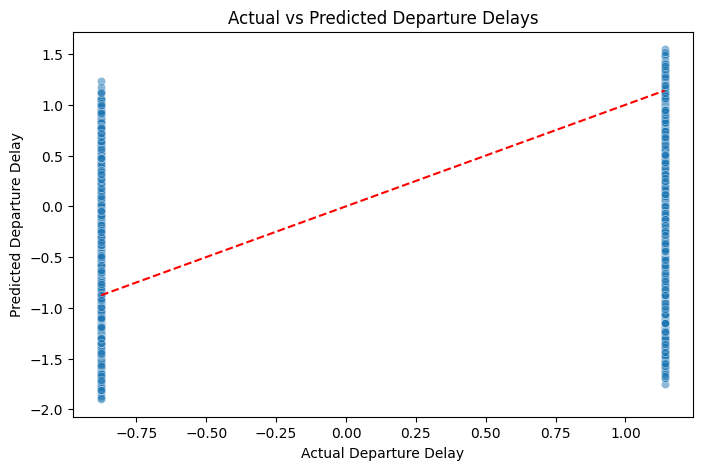

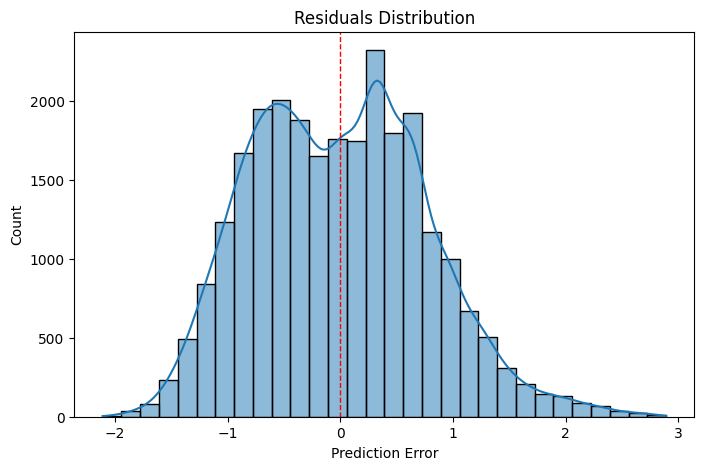

In [39]:
# Define features (same rating features used before)
X = df_encoded[rating_features]

# Define new target variable (Satisfaction)
y = df_encoded["Satisfaction"]

# Split the data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize & Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate Model Performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Display feature coefficients
coefficients = pd.DataFrame({"Feature": rating_features, "Coefficient": lin_reg.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=coefficients["Coefficient"], y=coefficients["Feature"], palette="coolwarm")
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title("Feature Coefficients in Linear Regression Model")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Ideal line
plt.xlabel("Actual Departure Delay")
plt.ylabel("Predicted Departure Delay")
plt.title("Actual vs Predicted Departure Delays")
plt.show()

# Residual Plot: Errors Distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Residuals Distribution")
plt.show()

In [40]:
# Select features (including original and engineered)
features = ['Age', 'Flight Distance', 'In-flight Wifi Service',
            'Departure and Arrival Time Convenience', 'Ease of Online Booking',
            'Gate Location', 'Food and Drink', 'Online Boarding', 'Seat Comfort',
            'In-flight Entertainment', 'On-board Service', 'Leg Room Service',
            'Baggage Handling', 'Check-in Service', 'In-flight Service',
            'Cleanliness', 'Departure Delay', 'Arrival Delay',
            'Long Delay', 'Loyal Business Traveler']

# Define the target variable
target = 'Satisfaction'

# Extract the selected features and target from the DataFrame
X = df_encoded[features]
y = df_encoded[target]

In [44]:
X.head()

,Age,Flight Distance,In-flight Wifi Service,Departure and Arrival Time Convenience,Ease of Online Booking,Gate Location,Food and Drink,Online Boarding,Seat Comfort,In-flight Entertainment,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,In-flight Service,Cleanliness,Departure Delay,Arrival Delay,Long Delay,Loyal Business Traveler
0,0.566960,-0.370261,0.204090,-0.037727,0.173445,0.018048,1.349867,-0.187037,1.181428,1.230787,-0.297587,-1.026310,1.159206,0.547894,1.153946,1.304487,-0.333948,-0.261490,0,0
1,-0.292868,-0.370261,-0.548166,-0.692719,-0.539957,-0.764109,-0.153973,1.293662,0.423441,1.230787,1.256300,1.252898,1.159206,-0.241883,1.153946,1.304487,0.296454,0.623553,0,0
2,0.103976,-0.338179,0.956346,0.617265,0.886847,0.800206,1.349867,1.293662,1.181428,-0.268414,-0.297587,-0.266574,-0.535681,0.547894,-0.545774,1.304487,-0.386481,-0.391644,0,0
3,0.699242,0.716512,-0.548166,-0.692719,-0.539957,-0.764109,0.597947,0.553313,1.181428,1.230787,1.256300,1.252898,1.159206,-0.241883,1.153946,0.543264,-0.386481,-0.391644,0,0
4,0.633101,2.285515,0.204090,-0.037727,0.173445,0.018048,0.597947,1.293662,0.423441,-0.268414,-0.297587,0.493162,-0.535681,-0.241883,-0.545774,1.304487,-0.386481,-0.365613,0,0


In [45]:
y

,Satisfaction
0,-0.876487
1,1.140918
2,1.140918
3,1.140918
4,1.140918
...,...
129875,-0.876487
129876,-0.876487
129877,-0.876487
129878,1.140918


In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R-squared: 0.4255
Mean Absolute Error (MAE): 0.6194
Root Mean Squared Error (RMSE): 0.7577


                                   Feature  Coefficient
18                              Long Delay     1.314174
7                          Online Boarding     0.321927
1                          Flight Distance     0.164801
2                   In-flight Wifi Service     0.136328
3   Departure and Arrival Time Convenience    -0.136205
11                        Leg Room Service     0.128543
9                  In-flight Entertainment     0.113648
10                        On-board Service     0.101671
13                        Check-in Service     0.085611
17                           Arrival Delay    -0.064645
4                   Ease of Online Booking    -0.058845
8                             Seat Comfort     0.048148
5                            Gate Location     0.043194
15                             Cleanliness     0.031380
12                        Baggage Handling     0.031255
6                           Food and Drink    -0.030202
16                         Departure Delay     0

<ipython-input-42-02a2e8d0774e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


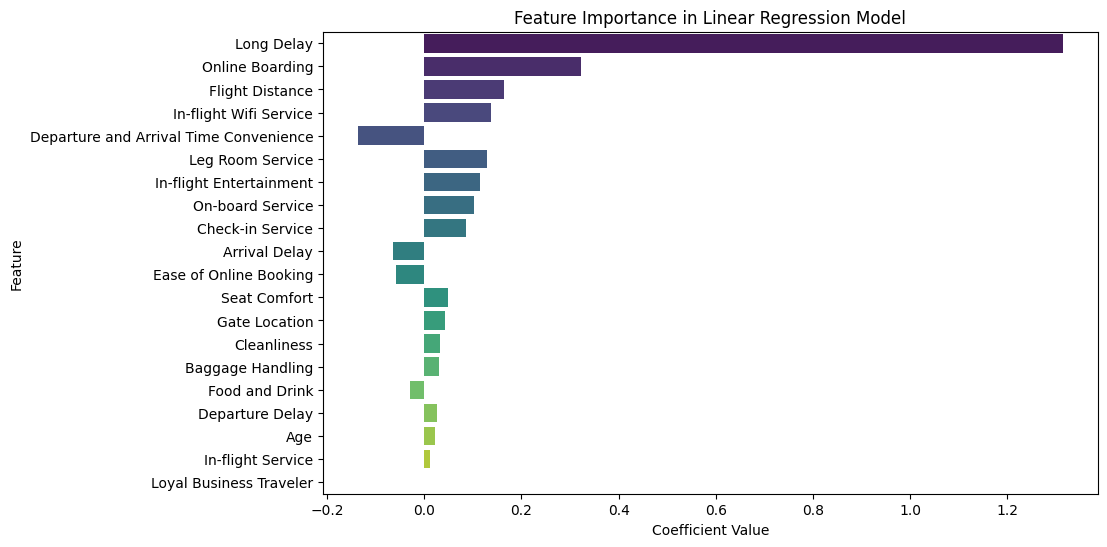

In [42]:
# Get the coefficients of the trained model
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})

# Sort the coefficients by absolute value to see the most impactful features
coefficients = coefficients.sort_values(by='Coefficient', ascending=False, key=abs)

# Print or visualize the coefficients
print(coefficients)

# Optional: Create a bar plot to visualize the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

### Unsupervised